In [17]:
from IPython.display import Latex
from math import sin,cos, atan, pi, log10, sqrt, tan, tanh, sinh, cosh
import pandas as pd
from matplotlib import pyplot as plt
from functools import reduce

In [18]:
 def u0(x):
    return sin(x) + cos(x)

In [19]:
def next_eyler_iteration(x, y1, y2, h):
    """
    Eyler iteration for equation:
    u'' + (cosx)u' + (sinx)u = 1 - cosx - sinx
    du/dx = y2 = dy1/dx
    y1 = u
    """
    y1_next = y1 + h * y2
    y2_next = y2 + h * (1 - y2 * cos(x) - cos(x) - sin(x) * (1 + y1))
    return y1_next, y2_next

def eyler_on_net(a, b, h):
    y1 = 1
    y2 = 1
    x = a
    yield a, y1
    while x <= b:
        y1, y2 = next_eyler_iteration(x, y1, y2, h)
        x = x + h
        yield x, y1

In [60]:
class Vec:
    def __init__(self, y1, y2):
        self.y1 = y1
        self.y2 = y2
    
    def __add__(self, other):
        return Vec(self.y1 + other.y1, self.y2 + other.y2)
    
    def __radd__(self, other):
        return Vec(self.y1 + other.y1, self.y2 + other.y2)
    
    def __iadd__(self, other):
        return Vec(self.y1 + other.y1, self.y2 + other.y2)
    
    def __mul__(self, other):
        return Vec(self.y1 * other, self.y2 * other)
    
    def __rmul__(self, other):
        return Vec(self.y1 * other, self.y2 * other)
    
    def __sub__(self, other):
        return Vec(self.y1 - other.y1, self.y2 - other.y2)
    
    def __rsub__(self, other):
        return -1 * self.__rsub__(other)
    
    def __truediv__(self, other):
        return self * (1 / other)
    
def f(x, y_vec):
    y2 = y_vec.y2
    y1 = y_vec.y1
    return Vec(y_vec.y2, (1 - y2 * cos(x) - cos(x) - sin(x) * (1 + y1)))

def runge_kutt_4_order_iteration(x, y1, y2, h):
    """
    Runge Kutta iteration for equation:
    u'' + (cosx)u' + (sinx)u = 1 - cosx - sinx
    du/dx = y2 = dy1/dx
    y1 = u
    """
    y = Vec(y1, y2)
    k1 = f(x, y)
    k2 = f(x + h / 2, y + h / 2 * k1)
    k3 = f(x + h / 2, y + h / 2 * k2)
    k4 = f(x + h, y + h * k3)
    y += h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
    return y.y1, y.y2

def runge_kutt_4_order(a, b, h):
    y1 = 1
    y2 = 1
    x = a
    yield a, y1
    while x <= b:
        y1, y2 = runge_kutt_4_order_iteration(x, y1, y2, h)
        x = x + h
        if x > b:
            break
        yield x, y1

In [61]:
def du(x):
    return cos(x) - sin(x)

In [62]:
def adams_iter(x, y0, y1, y2, h):
    k1 = f(x, y0) * h
    k2 = f(x - h, y1) * h
    k3 = f(x - 2 * h, y2) * h
    y = y0 + (23 * k1 - 16 * k2 + 5 * k3) / 12
    return y

def adams(a, b, h):
    x = a + 2 * h
    y2 = Vec(1, 1)
    y1 = Vec(u0(a + h), du(a + h))
    y0 = Vec(u0(a + 2 * h), du(a + 2 * h))
    yield a,y2.y1
    yield a + h, y1.y1
    yield a + 2 * h, y0.y1
    while x <= b:
        y = adams_iter(x, y0, y1, y2, h)
        y2 = y1
        y1 = y0
        y0 = y
        x += h
        yield x, y.y1

In [66]:
def net(a, b, h):
    x = a
    yield x, u0(x)
    while x <= b:
        x += h
        yield x, u0(x)
        
def runge_correct():
    _x, _y = zip(*list(runge_kutt_4_order(0, 1, 0.05)))
    x, y = zip(*list(runge_kutt_4_order(0, 1, 0.1)))
    length = len(_y) - 1
    return x, [(_y[2 * i - (1 if 2 * i > length else 0)] * 4 - y[i]) / 3 for i, _x in enumerate(x)]

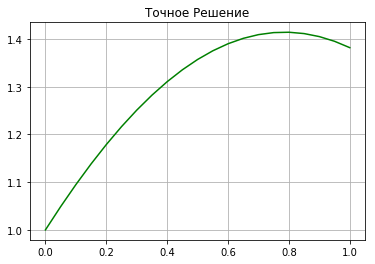

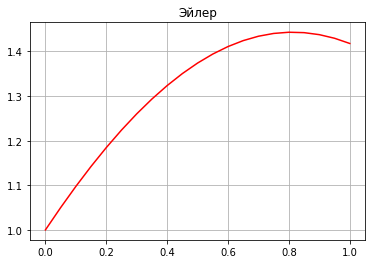

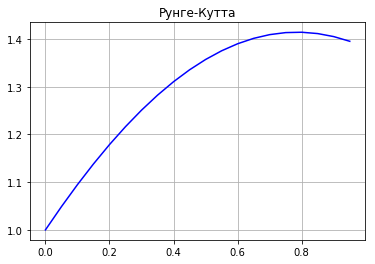

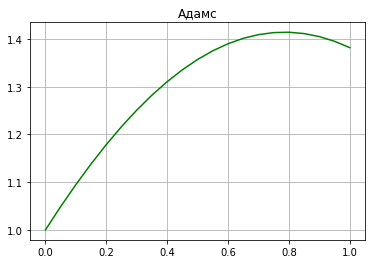

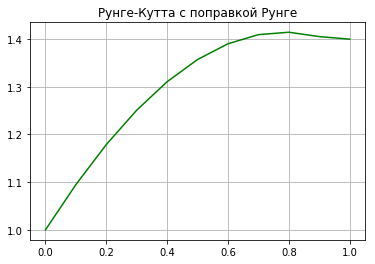

In [67]:
x, y = zip(*list(net(0,1, 0.05)))
plt.figure(1)
plt.plot(
    x,
    y,
    'g',
)
plt.title("Точное Решение")

plt.grid(True)

x, y = zip(*list(eyler_on_net(0, 1, 0.05)))

plt.figure(2)
plt.plot(
    x,
    y,
    'r'
)
plt.title("Эйлер")

plt.grid(True)

x, y = zip(*list(runge_kutt_4_order(0, 1, 0.05)))
plt.figure(3)
plt.plot(
    x,
    y,
    'b',
)

plt.title("Рунге-Кутта")

plt.grid(True)

x, y = zip(*list(adams(0, 1, 0.05)))
plt.figure(4)
plt.plot(
    x,
    y,
    'g',
)
plt.title("Адамс")

plt.grid(True)

x, y = runge_correct()
plt.figure(5)
plt.plot(
    x,
    y,
    'g',
)
plt.title("Рунге-Кутта с поправкой Рунге")

plt.grid(True)

[0.007147718895715416, 0.0007134024636414882, 7.133251717172939e-05, 7.132561277378713e-06]
[5.353295584598072e-11, 9.325873406851315e-15, 1.84297022087776e-14, 5.833111771380572e-13]
[5.243454948011816e-07, 5.338787190112271e-10, 5.448974604860268e-13, 5.844214001626824e-13]


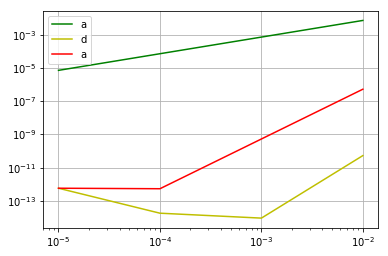

In [84]:
err_eyler = [max(abs((u0(x) - y))for x, y in eyler_on_net(0, 1, step)) for step in [10 ** (-i) for i in range(2, 6)]]
err_runge = [max(abs((u0(x) - y)) for x, y in runge_kutt_4_order(0, 1, step)) for step in [10 ** (-i) for i in range(2, 6)]]
err_adams = [max(abs((u0(x) - y))for x, y in adams(0, 1, step)) for step in [10 ** (-i) for i in range(2, 6)]]
x = [10 ** (-i) for i in range(2, 6)]
print(err_eyler)
print(err_runge)
print(err_adams)
plt.xscale('log')
plt.yscale('log')
plt.plot(
    x,
    err_eyler,
    'g',
)
plt.legend('eyler')

plt.plot(
    x,
    err_runge,
    'y',
)
plt.legend('runge')

plt.plot(
    x,
    err_adams,
    'r',
)
plt.grid(True)
plt.legend('adams')
